## 1.Import Libraries

In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


## Now as per the task we have to use description to predict category so we will just use description and product_category_tree column 

In [4]:
df1=df[['description','product_category_tree']]

In [5]:
df1.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl..."
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[""Furniture >> Living Room Furniture >> Sofa B..."
2,Key Features of AW Bellies Sandals Wedges Heel...,"[""Footwear >> Women's Footwear >> Ballerinas >..."
3,Key Features of Alisha Solid Women's Cycling S...,"[""Clothing >> Women's Clothing >> Lingerie, Sl..."
4,Specifications of Sicons All Purpose Arnica Do...,"[""Pet Supplies >> Grooming >> Skin & Coat Care..."


### Dropping down N/A entries in dataframe df1



In [6]:
df1=df1.dropna()

### Changing description and product to lower case to avoid repetition due to case sensativity

In [7]:
df1=df1.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [8]:
df1


,description,product_category_tree
0,key features of alisha solid women's cycling s...,"[""clothing >> women's clothing >> lingerie, sl..."
1,fabhomedecor fabric double sofa bed (finish co...,"[""furniture >> living room furniture >> sofa b..."
2,key features of aw bellies sandals wedges heel...,"[""footwear >> women's footwear >> ballerinas >..."
3,key features of alisha solid women's cycling s...,"[""clothing >> women's clothing >> lingerie, sl..."
4,specifications of sicons all purpose arnica do...,"[""pet supplies >> grooming >> skin & coat care..."
...,...,...
19995,buy walldesign small vinyl sticker for rs.730 ...,"[""baby care >> baby & kids gifts >> stickers >..."
19996,buy wallmantra large vinyl stickers sticker fo...,"[""baby care >> baby & kids gifts >> stickers >..."
19997,buy elite collection medium acrylic sticker fo...,"[""baby care >> baby & kids gifts >> stickers >..."
19998,buy elite collection medium acrylic sticker fo...,"[""baby care >> baby & kids gifts >> stickers >..."


### Dropping Duplicates

In [9]:
df1 = df1.drop_duplicates()
df1

,description,product_category_tree
0,key features of alisha solid women's cycling s...,"[""clothing >> women's clothing >> lingerie, sl..."
1,fabhomedecor fabric double sofa bed (finish co...,"[""furniture >> living room furniture >> sofa b..."
2,key features of aw bellies sandals wedges heel...,"[""footwear >> women's footwear >> ballerinas >..."
3,key features of alisha solid women's cycling s...,"[""clothing >> women's clothing >> lingerie, sl..."
4,specifications of sicons all purpose arnica do...,"[""pet supplies >> grooming >> skin & coat care..."
...,...,...
19966,buy wallmantra large vinyl stickers sticker fo...,"[""baby care >> baby & kids gifts >> stickers >..."
19967,buy wallmantra extra large vinyl stickers stic...,"[""baby care >> baby & kids gifts >> stickers >..."
19970,buy wallmantra extra large vinyl stickers stic...,"[""baby care >> baby & kids gifts >> stickers >..."
19974,buy wallmantra extra large vinyl stickers stic...,"[""baby care >> baby & kids gifts >> stickers >..."


#### There were many values which were duplicate in dataset .We have removed them 


## In this section we will work on  pre processing product_category_tree

In [10]:
df1.groupby('product_category_tree').describe()

description         \
                                                         count unique   
product_category_tree                                                   
["883 police full sleeve solid men's jacket"]                1      1   
["abeez boys, men, girls (black, pack of 1)"]                1      1   
["abhinl fashion cotton printed semi-stitched s...           1      1   
["adidas ind pro thi gua thigh guard (white, bl...           1      1   
["ajaero slim fit women's dark blue jeans"]                  2      2   
...                                                        ...    ...   
["xy decor cotton sofa cover (white pack of 6)"]             1      1   
["yo baby girl's trousers"]                                  1      1   
["zevrr sterling silver swarovski zirconia plat...           1      1   
["zikrak exim women wedges"]                                 1      1   
["zixtro bug (black, backpack)"]                             1      1   

                                                                                                       \
                                                                                                  top   
product_category_tree                                                                                   
["883 police full sleeve solid men's jacket"]       key features of 883 police full sleeve solid m...   
["abeez boys, men, girls (black, pack of 1)"]       key features of abeez boys, men, girls wrist b...   
["abhinl fashion cotton printed semi-stitched s...  key features of abhinl fashion cotton printed ...   
["adidas ind pro thi gua thigh guard (white, bl...  specifications of adidas ind pro thi gua thigh...   
["ajaero slim fit women's dark blue jeans"]         key features of ajaero slim fit women's dark b...   
...                                                                                               ...   
["xy decor cotton sofa cover (white pack of 6)"]    xy decor cotton sofa cover (white pack of 6) p...   
["yo baby girl's trousers"]                         key features of yo baby girl's trousers occasi...   
["zevrr sterling silver swarovski zirconia plat...  key features of zevrr sterling silver swarovsk...   
["zikrak exim women wedges"]                        key features of zikrak exim women wedges sole ...   
["zixtro bug (black, backpack)"]                    specifications of zixtro bug (black, backpack)...   

                                                         
                                                   freq  
product_category_tree                                    
["883 police full sleeve solid men's jacket"]         1  
["abeez boys, men, girls (black, pack of 1)"]         1  
["abhinl fashion cotton printed semi-stitched s...    1  
["adidas ind pro thi gua thigh guard (white, bl...    1  
["ajaero slim fit women's dark blue jeans"]           1  
...                                                 ...  
["xy decor cotton sofa cover (white pack of 6)"]      1  
["yo baby girl's trousers"]                           1  
["zevrr sterling silver swarovski zirconia plat...    1  
["zikrak exim women wedges"]                          1  
["zixtro bug (black, backpack)"]                      1  

[6406 rows x 4 columns]

### There are 6406 different types of entries in product_category_tree so we intend to obtain product head from  them so that classification can be done in better manner


In [11]:
# Cat fuction will clean the product_category_tree and will return category head if available else will return 'N/A'
def cat(s):
    # ["baby care >> baby & kids gifts >> stickers >...
    #["baby care --> will be obtined as parts and category head will be baby care
    if(s.find('>>')!=-1):  
        parts = s.split(">>")
        category_head=parts[0][2:]
        if(category_head[-1]==']'):
            category_head = category_head[:-2]
        return category_head
    else:
        return 'N/A'

In [12]:
#calling the cat function on product_category_tree
df1['product_category_tree']=df1['product_category_tree'].apply(cat)
df1

<ipython-input-12-b5f888a3ce4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['product_category_tree']=df1['product_category_tree'].apply(cat)


,description,product_category_tree
0,key features of alisha solid women's cycling s...,clothing
1,fabhomedecor fabric double sofa bed (finish co...,furniture
2,key features of aw bellies sandals wedges heel...,footwear
3,key features of alisha solid women's cycling s...,clothing
4,specifications of sicons all purpose arnica do...,pet supplies
...,...,...
19966,buy wallmantra large vinyl stickers sticker fo...,baby care
19967,buy wallmantra extra large vinyl stickers stic...,baby care
19970,buy wallmantra extra large vinyl stickers stic...,baby care
19974,buy wallmantra extra large vinyl stickers stic...,baby care


### Visualising  product_category_tree after cat processing 

In [13]:
df1.groupby('product_category_tree').describe()

description         \
                                         count unique   
product_category_tree                                   
N/A                                        326    326   
automation & robotics                        1      1   
automotive                                1009   1009   
baby care                                  323    323   
bags, wallets & belts                      258    258   
beauty and personal care                   698    698   
cameras & accessories                       82     82   
clothing                                  5494   5491   
computers                                  576    576   
ebooks                                      15     15   
eyewear                                     10     10   
food & nutrition                             2      2   
footwear                                  1122   1122   
furniture                                  176    176   
gaming                                      35     35   
health & personal care appliances           43     43   
home & kitchen                              24     24   
home decor & festive needs                 819    819   
home entertainment                          19     19   
home furnishing                            544    544   
home improvement                            81     81   
household supplies                           4      4   
jewellery                                 2939   2939   
kitchen & dining                           643    643   
mobiles & accessories                      584    584   
pens & stationery                          274    273   
pet supplies                                30     30   
sports & fitness                           166    166   
sunglasses                                  35     35   
tools & hardware                           333    333   
toys & school supplies                     319    319   
watches                                    530    530   
wearable smart devices                       2      2   

                                                                                       \
                                                                                  top   
product_category_tree                                                                   
N/A                                 key features of skayvon summersible single pha...   
automation & robotics               buy yale ydr3110 smart door lock for rs.17000 ...   
automotive                          speedwav single pipe air pressure horn-chevrol...   
baby care                           key features of jacadi paris baby boy's stripe...   
bags, wallets & belts               flipkart.com: buy saashiwear hand-held bag for...   
beauty and personal care            goldencollections beautiful stylish jewellery ...   
cameras & accessories               buy spe ew-73b  lens hood only for rs. 850 fro...   
clothing                            hello dolly women's leggings - buy multicolor ...   
computers                           zaicus itag bluetooth tracer anti lost alarm r...   
ebooks                              buy fast italian with elisabeth smith (courseb...   
eyewear                             key features of ted smith full rim wayfarer fr...   
food & nutrition                    specifications of stamin mass gainers (2 kg, s...   
footwear                            mactree genuine leather lace up shoes\n       ...   
furniture                           buy hometown ciaz fabric 3 seater sectional fo...   
gaming                              key features of qline superman wired headset h...   
health & personal care appliances   babylisspro hair dryer bonnet price: rs. 6,861...   
home & kitchen                      key features of lg mc3286blt 32 l convection m...   
home decor & festive needs          wallmantra motivational quote framed print can...   
home entertainment                  specifications of ibz micromax e390 dock (whit...   
home furnishing         

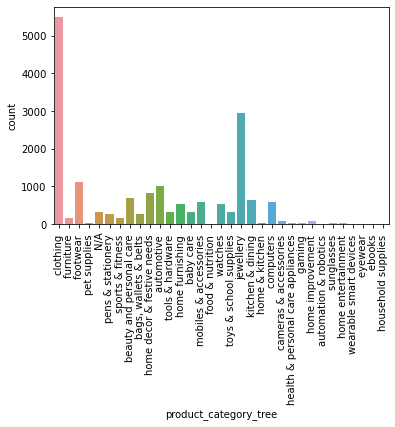

In [14]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(30,15)
sns.countplot(x='product_category_tree',data= df1)

In [15]:
df1 = df1.drop_duplicates()
df1

,description,product_category_tree
0,key features of alisha solid women's cycling s...,clothing
1,fabhomedecor fabric double sofa bed (finish co...,furniture
2,key features of aw bellies sandals wedges heel...,footwear
3,key features of alisha solid women's cycling s...,clothing
4,specifications of sicons all purpose arnica do...,pet supplies
...,...,...
19966,buy wallmantra large vinyl stickers sticker fo...,baby care
19967,buy wallmantra extra large vinyl stickers stic...,baby care
19970,buy wallmantra extra large vinyl stickers stic...,baby care
19974,buy wallmantra extra large vinyl stickers stic...,baby care


### As our product_category_tree contains count value ranging from 1-5493 therefore our model will not able to have proper data to get trained to predict classes like 'automation & robotics' ,'petsupplies', etc as they are very few in numbers
 #### So we will remove entries with count less than 50 and N/A to reduce the bias
 

In [16]:
def delete(x):
    del_list=['N/A','automation & robotics ','eyewear ','food & nutrition ','gaming ','health & personal care appliances ','home & kitchen ','home entertainment ','household supplies ','pet supplies ','sunglasses ','wearable smart devices ','ebooks ']
    if x in del_list:
        return False
    else:
        return True

In [17]:
# applying delete function on categories with count <50
df1['bool']=df1['product_category_tree'].apply(delete)


<ipython-input-17-6c87181b4649>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bool']=df1['product_category_tree'].apply(delete)


In [18]:
df1

,description,product_category_tree,bool
0,key features of alisha solid women's cycling s...,clothing,True
1,fabhomedecor fabric double sofa bed (finish co...,furniture,True
2,key features of aw bellies sandals wedges heel...,footwear,True
3,key features of alisha solid women's cycling s...,clothing,True
4,specifications of sicons all purpose arnica do...,pet supplies,False
...,...,...,...
19966,buy wallmantra large vinyl stickers sticker fo...,baby care,True
19967,buy wallmantra extra large vinyl stickers stic...,baby care,True
19970,buy wallmantra extra large vinyl stickers stic...,baby care,True
19974,buy wallmantra extra large vinyl stickers stic...,baby care,True


In [19]:
df1=df1[df1['bool']==True]

In [20]:
df1

,description,product_category_tree,bool
0,key features of alisha solid women's cycling s...,clothing,True
1,fabhomedecor fabric double sofa bed (finish co...,furniture,True
2,key features of aw bellies sandals wedges heel...,footwear,True
3,key features of alisha solid women's cycling s...,clothing,True
6,key features of alisha solid women's cycling s...,clothing,True
...,...,...,...
19966,buy wallmantra large vinyl stickers sticker fo...,baby care,True
19967,buy wallmantra extra large vinyl stickers stic...,baby care,True
19970,buy wallmantra extra large vinyl stickers stic...,baby care,True
19974,buy wallmantra extra large vinyl stickers stic...,baby care,True


### Visualising product_category_tree after removal of producthead with count <50

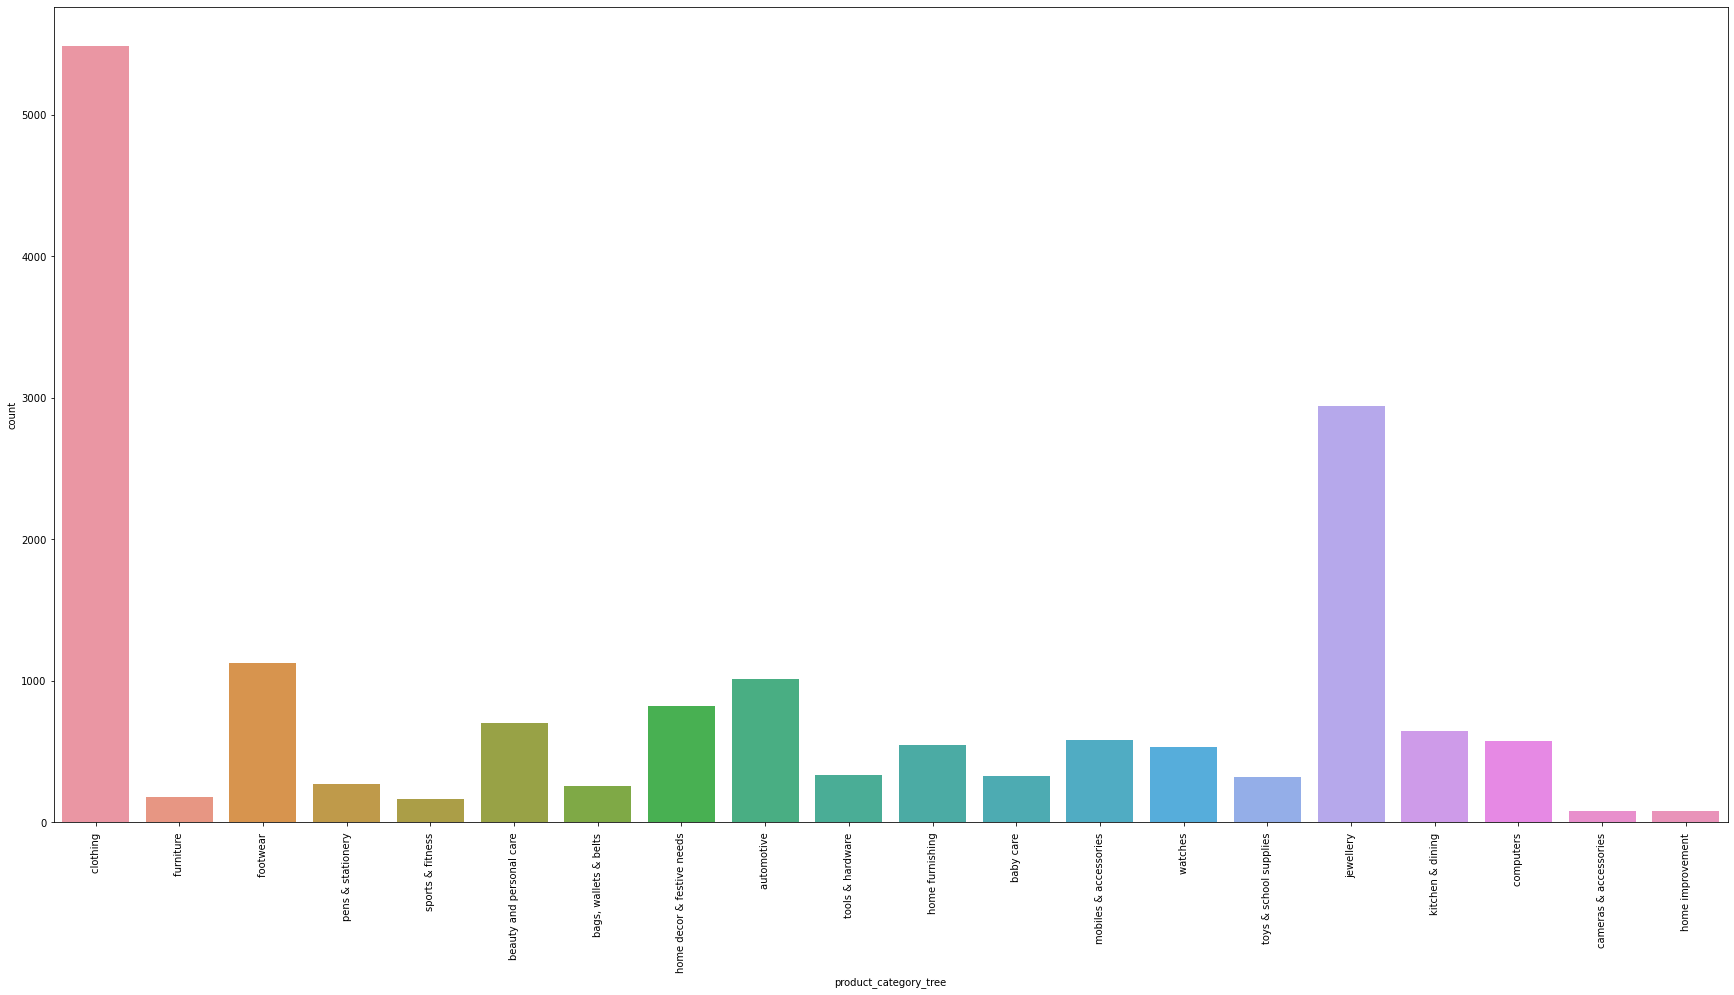

In [21]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(30,15)
sns.countplot(x='product_category_tree',data= df1)

## Now we will create modiefied dataframe ("mdf")containing description and modiefied product_category_tree only and will process 'description'



In [22]:
mdf=df1[['description','product_category_tree']]
mdf.info()
mdf.describe()
mdf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16966 entries, 0 to 19976
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            16966 non-null  object
 1   product_category_tree  16966 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


,description,product_category_tree
0,key features of alisha solid women's cycling s...,clothing
1,fabhomedecor fabric double sofa bed (finish co...,furniture
2,key features of aw bellies sandals wedges heel...,footwear
3,key features of alisha solid women's cycling s...,clothing
6,key features of alisha solid women's cycling s...,clothing
...,...,...
19966,buy wallmantra large vinyl stickers sticker fo...,baby care
19967,buy wallmantra extra large vinyl stickers stic...,baby care
19970,buy wallmantra extra large vinyl stickers stic...,baby care
19974,buy wallmantra extra large vinyl stickers stic...,baby care


In [23]:
classes = mdf['product_category_tree']
print(classes.value_counts())

clothing                       5491
jewellery                      2939
footwear                       1122
automotive                     1009
home decor & festive needs      819
beauty and personal care        698
kitchen & dining                643
mobiles & accessories           584
computers                       576
home furnishing                 544
watches                         530
tools & hardware                333
baby care                       323
toys & school supplies          319
pens & stationery               273
bags, wallets & belts           258
furniture                       176
sports & fitness                166
cameras & accessories            82
home improvement                 81
Name: product_category_tree, dtype: int64


## changing  product_category_tree to labels for computation

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y = encoder.fit_transform(classes)
print(Y[:20])

[ 5  8  7  5  5  8  7  5  7  5  5 15  5  8  7  5  8  5  5  7]


In [25]:
#modifiing description to improve the model for training
text_description = mdf['description']

### Using regular expressions to replace specific details 

In [26]:
# regex

# Replace email addresses with 'email'
sf = text_description.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
sf = sf.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace numbers with 'numbr'
sf = sf.str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
sf = sf.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
sf = sf.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
sf = sf.str.replace(r'^\s+|\s+?$', '')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
sf = sf.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr')

In [27]:
sf

0        key features of alisha solid women s cycling s...
1        fabhomedecor fabric double sofa bed finish col...
2        key features of aw bellies sandals wedges heel...
3        key features of alisha solid women s cycling s...
6        key features of alisha solid women s cycling s...
                               ...                        
19966    buy wallmantra large vinyl stickers sticker fo...
19967    buy wallmantra extra large vinyl stickers stic...
19970    buy wallmantra extra large vinyl stickers stic...
19974    buy wallmantra extra large vinyl stickers stic...
19976    uberlyfe extra large vinyl sticker pack of num...
Name: description, Length: 16966, dtype: object

### removing stop words('ourselves’, ‘hers’, ‘between’, ‘yourself’, ‘but’, ‘again’, ‘there’, etc.) to improve the accuracy of model to predict category

In [28]:
from nltk.corpus import stopwords

# remove stop words from text descriptions

stop_words = set(stopwords.words('english'))

sf = sf.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

### removing stem words because they have same sense(help,helping,helped) to improve the description

In [29]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

sf = sf.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

### Tokenization is a way of separating a piece of text into smaller units called tokens.
   #### It is must to perform NLP

In [30]:
from nltk.tokenize import word_tokenize

# create bag-of-words
all_words = []

for description in sf:
    words = word_tokenize(description)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [31]:
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(50)))

Number of words: 15770
Most common words: [('numbr', 58601), ('rs', 15022), ('product', 10253), ('buy', 9837), ('women', 9448), ('onlin', 8884), ('com', 8810), ('flipkart', 8778), ('price', 7583), ('day', 7202), ('free', 7174), ('replac', 6787), ('genuin', 6717), ('deliveri', 6629), ('featur', 6615), ('ship', 6590), ('cash', 6586), ('guarante', 6351), ('brand', 6062), ('color', 6049), ('design', 5561), ('shirt', 5253), ('detail', 4964), ('type', 4789), ('specif', 4761), ('casual', 4745), ('fabric', 4523), ('men', 4454), ('print', 4432), ('materi', 4402), ('cm', 4305), ('gener', 4300), ('set', 4279), ('box', 4038), ('india', 4006), ('collect', 3965), ('pack', 3809), ('cotton', 3701), ('solid', 3588), ('cloth', 3577), ('number', 3381), ('gold', 3375), ('packag', 3264), ('key', 3255), ('sleev', 3254), ('shop', 3201), ('ideal', 3188), ('huge', 3174), ('apparel', 3110), ('neck', 3099)]


### Creating word_features from top 2000 words used .We can extend 2000 to all the words or words less than that  but it will impact time of training the model

In [32]:
word_features = list(all_words.keys())[:2000]

In [33]:
# The find_features function will determine which of the 2000 word features are contained in the description_message
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Lets check for an example!
features = find_features(sf[1])
for key, value in features.items():
    if value == True:
        print(key)

specif
detail
number
numbr
fabric
type
gener
care
water
style
box
fabhomedecor
doubl
sofa
bed
finish
color
leatherett
black
mechan
pull
price
rs
fine
deep
seat
experi
save
space
new
click
clack
easi
fold
vice
versa
simpl
chrome
leg
mango
wood
frame
long
term
durabl
cushion
provid
extra
soft
make
easili
sleep
two
instal
demo
product
done
free
cost
part
purchas
servic
partner
visit
locat
within
busi
hour
deliveri
brand
mattress
includ
condit
knock
storag
contemporari
modern
fill
materi
microfib
capac
seater
upholsteri
na
size
shape
squar
suitabl
live
room
model
fhdnumbr
instruct
avoid
outdoor
use
exposur
prolong
moistur
direct
heat
sunlight
caus
colour
fade
keep
sharp
object
away
littl
tear
cover
may
hard
repair
vacuum
period
bristl
bru
view
brush
attach
lightli
dirt
dust
prevent
embed
fibr
tri
food
drink
spillag
kind
spill
occur
leav
unattend
case
stain
cleaner
howev
appli
directli
damag
pour
onto
clean
cloth
test
effect
hidden
area
profession
scotchguard
treatment
one
easiest
option
pr

### making a zip from modified description and modiefied product_category_head

In [34]:
messages = zip(sf, Y)

In [35]:
# call find_features function for each description
featuresets = [(find_features(text), label) for (text, label) in messages]

In [36]:
from sklearn import model_selection

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=1)

In [37]:
print(len(training))
print(len(testing))

12724
4242


## SVC model

In [38]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 96.18104667609619


## Random forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
nltk_model = SklearnClassifier(rfc)
nltk_model.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Random Forest Accuracy: {}".format(accuracy))

Random Forest Accuracy: 95.992456388496


## Logistic Regression



In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
nltk_model = SklearnClassifier(lr)
nltk_model.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Logistic Regression Accuracy: {}".format(accuracy))

/home/naman_pc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 96.4875058934465


##  Iteration 2:trying to improve the accuracy of model

In [45]:
# earlier we considered only 2000 frequently used words now considering 4000 words we can increase it but that would take lots of time.
word_features = list(all_words.keys())[:4000]
messages = zip(sf, Y)

In [46]:
featuresets = [(find_features(text), label) for (text, label) in messages]
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=1)

## SVC-2 model

In [47]:
model = SklearnClassifier(SVC(kernel = 'linear'))
model.train(training)
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy_4000: {}".format(accuracy))

SVC Accuracy_4000: 97.31258840169731


## Random Forest-2 model

In [48]:
nltk_model = SklearnClassifier(rfc)
nltk_model.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Random Forest Accuracy: {}".format(accuracy))

Random Forest Accuracy: 96.60537482319661


## logistic regression-2 model


In [49]:
nltk_model = SklearnClassifier(lr)
nltk_model.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Logistic Regression Accuracy: {}".format(accuracy))

/home/naman_pc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 97.45403111739745


###  To further increase accuracy of model we can try other Machine learning models 
###  Train model on more words 
###   We can also try using different tokenizing methods for evaluation 

## ------------------------------------------Thank You--------------------------------------------------------------------